## Preliminary Results
---

In [1]:
import pandas as pd
import numpy as np
import crowded.method as cr
import crowded.iterate as ci
import matplotlib.pyplot as plt
%matplotlib inline

#### Predefined Parameters

In [2]:
total_tasks = 100
total_workers = 40
p_hard_t = 0.1
p_good_w = 0.9
answers_key = ["liver", "blood", "lung", "brain", "heart"]
p_train_t = 0.5
workers_per_task = 5

In [3]:
accu, prop = ci.Iterate('total_tasks').get_accuracy(
    total_tasks, total_workers, p_hard_t, p_good_w, answers_key, p_train_t, workers_per_task)

In [4]:
accu

0.88118347338935565

In [5]:
prop

0.314

---
#### Comparing Accuracy Changing the Number of Workers

In [70]:
max_value=100
number_iterations = 5

In [71]:
df_iterations = ci.Iterate('total_workers').table(max_value, number_iterations)

In [72]:
table = df_iterations.groupby('total_workers').mean()
std = df_iterations.groupby('total_workers').std()

In [73]:
table.sort_values('accuracy', ascending=False).head(10)#['accuracy']

,accuracy,simulation
total_workers,,
79,0.925113,2.0
31,0.916190,1.0
18,0.907143,2.0
71,0.905212,2.0
42,0.904659,2.0
53,0.903315,2.0
33,0.901383,2.0
34,0.901114,2.0
74,0.901029,2.0


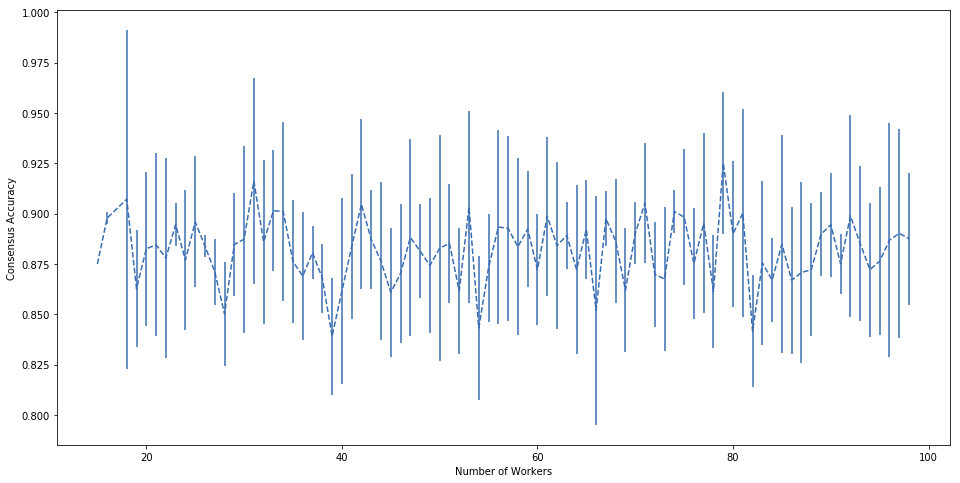

In [74]:
plt.figure(figsize=[16, 8])
plt.errorbar(table.index, table['accuracy'], yerr=std['accuracy'], color='#386cb0', linestyle='--')
plt.xlabel('Number of Workers')
plt.ylabel('Consensus Accuracy')
plt.savefig('../reports/'+str(max_value)+'workers'+str(number_iterations)+'iterations.png')

---
#### Comparing Accuracy Changing the Number of Tasks

In [75]:
max_value=100
number_iterations = 5

In [76]:
df_iterations = ci.Iterate('total_tasks').table(max_value, number_iterations)

In [77]:
table = df_iterations.groupby('total_tasks').mean()
std = df_iterations.groupby('total_tasks').std()

In [78]:
table.sort_values('accuracy', ascending=False).head(10)

,accuracy,simulation
total_tasks,,
17,1.000000,4.00
23,0.950000,2.00
13,0.950000,1.50
14,0.950000,0.50
18,0.933333,1.50
45,0.933333,2.00
29,0.931111,2.00
32,0.926786,1.75
40,0.920667,2.00


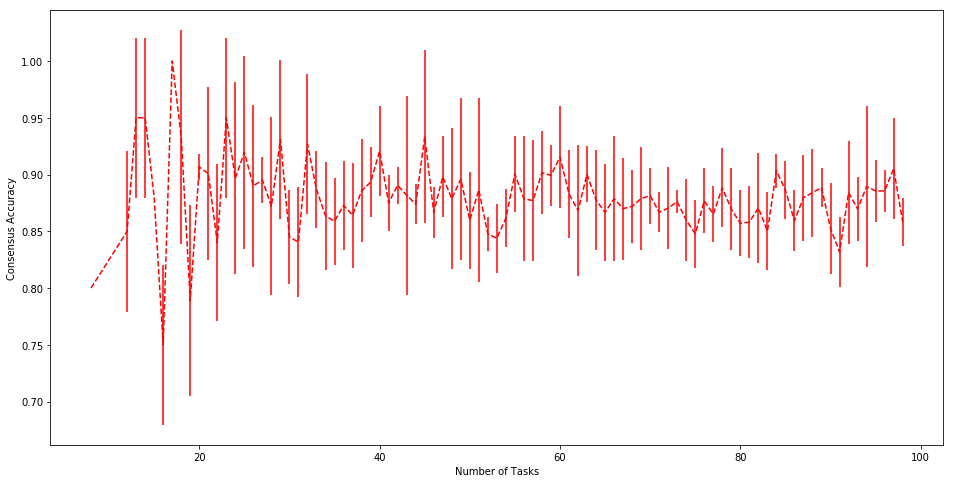

In [79]:
plt.figure(figsize=[16, 8])
plt.errorbar(table.index, table['accuracy'], yerr=std['accuracy'], color='red', linestyle='--')
plt.xlabel('Number of Tasks')
plt.ylabel('Consensus Accuracy')
plt.savefig('../reports/'+str(max_value)+'tasks'+str(number_iterations)+'iterations.png')

---
#### Comparing Accuracy Changing the Number of Workers per Task

In [80]:
max_value=400
number_iterations = 5

In [81]:
df_iterations = ci.Iterate('workers_per_task').table(max_value, number_iterations)

In [82]:
table = df_iterations.groupby('workers_per_task').mean()
std = df_iterations.groupby('workers_per_task').std()

In [83]:
table.sort_values('accuracy', ascending=False).head(10)

,accuracy,simulation
workers_per_task,,
3,0.876323,1.333333
1,0.874888,1.000000
4,0.874127,1.500000
2,0.873323,2.000000
0,0.850884,2.000000


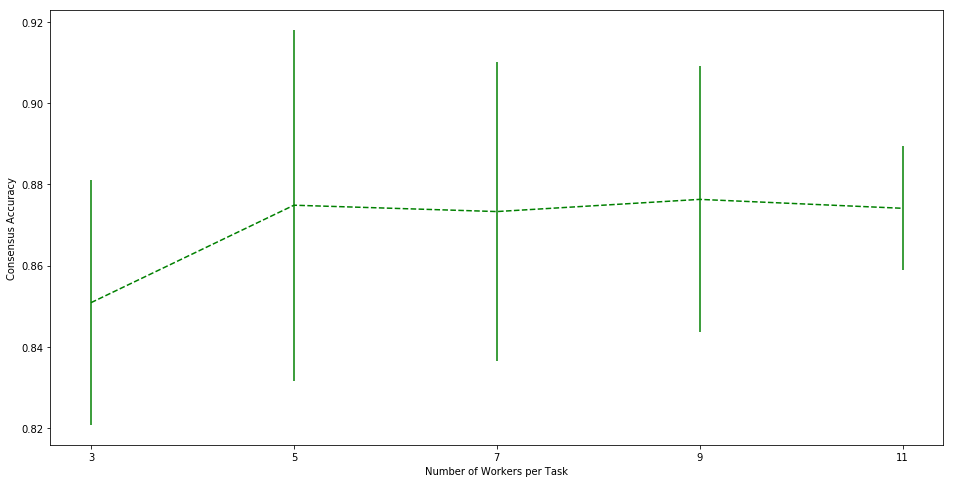

In [84]:
plt.figure(figsize=[16, 8])
plt.errorbar(table.index, table['accuracy'], yerr=std['accuracy'], color='g', linestyle='--')
plt.xticks(range(len(table.index)), np.arange(3, 200, 2))
plt.xlabel('Number of Workers per Task')
plt.ylabel('Consensus Accuracy')
plt.savefig('../reports/'+str(max_value)+'workerspertask'+str(number_iterations)+'iterations.png')

---
#### Comparing Accuracy Changing the Percentage of Training Workers in Stage 1

In [85]:
max_value = 1
number_iterations = 5

In [86]:
df_iterations = ci.Iterate('p_train_t').table(max_value=1, number_iterations = 5)

In [87]:
table = df_iterations.groupby('p_train_t').mean()
std = df_iterations.groupby('p_train_t').std()

In [88]:
table.sort_values('accuracy', ascending=False).head(10)

,accuracy,simulation
p_train_t,,
85,0.947374,2.0
11,0.920017,2.0
17,0.913927,2.5
26,0.912041,2.0
87,0.910478,2.0
61,0.908278,2.0
67,0.907333,2.0
14,0.905361,2.0
25,0.902740,1.5


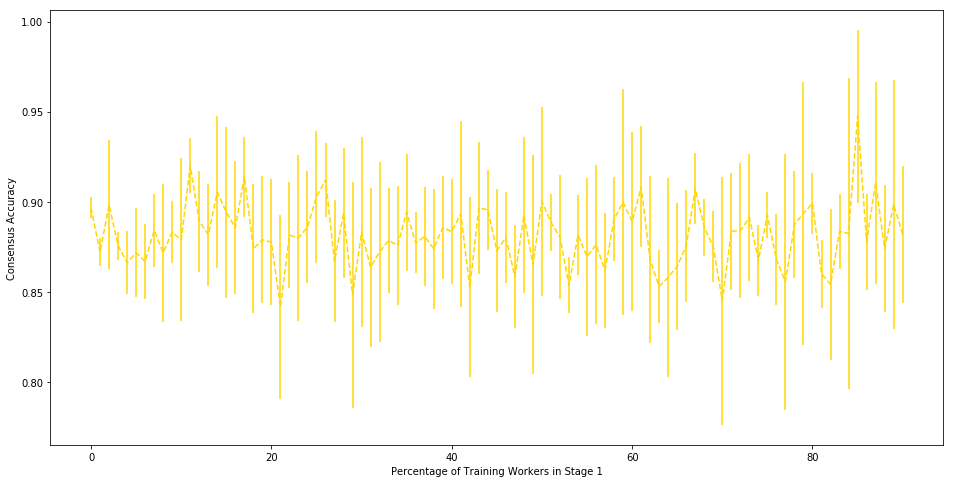

In [89]:
plt.figure(figsize=[16, 8])
plt.errorbar(table.index, table['accuracy'], yerr=std['accuracy'], color='gold', linestyle='--')
plt.xlabel('Percentage of Training Workers in Stage 1')
plt.ylabel('Consensus Accuracy')
plt.savefig('../reports/'+str(max_value)+'percantagetrain'+str(number_iterations)+'iterations.png')